In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

/home/gokul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv('sim_results.csv')

In [3]:
df

,Unnamed: 0,model,noiseObs,MI
0,0,krumsiek11,0.000100,3.413946
1,1,krumsiek11,0.000464,3.381075
2,2,krumsiek11,0.002154,3.297364
3,3,krumsiek11,0.010000,2.997611
4,4,krumsiek11,0.046416,2.212676
5,5,krumsiek11,0.215443,1.142512
6,6,krumsiek11,1.000000,0.062737
7,7,krumsiek11,4.641589,-0.002775
8,8,krumsiek11,21.544347,0.065801
9,9,krumsiek11,100.000000,0.007719


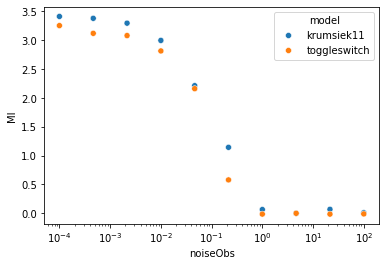

In [4]:
sns.scatterplot(data=df, x='noiseObs', y='MI', hue='model', marker='o')
plt.xscale('log')

In [5]:
from lmfit import Model

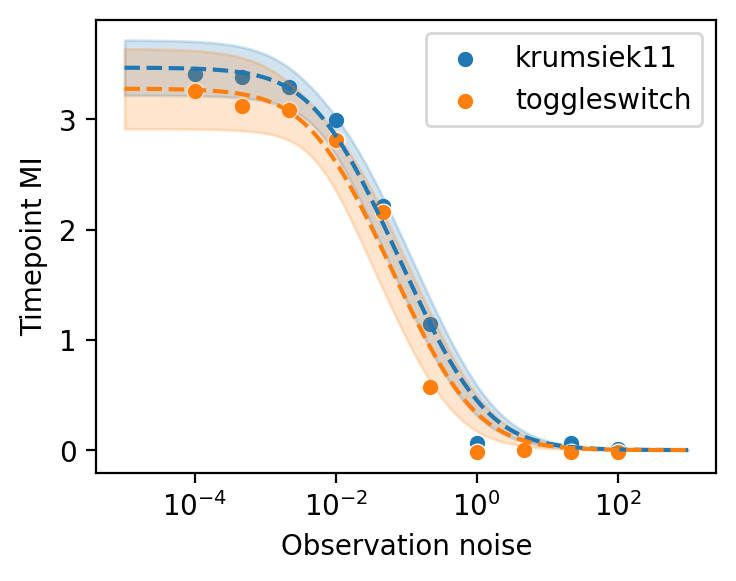

In [6]:
def info_scaling(x, A, B):
    return 0.5 * np.log2(((1/x)*B+ 1)/(1+A*(1/x)))


fig = plt.figure(figsize=(4,3), dpi=200)

pretty_palette = sns.color_palette('tab10')
for i, m in enumerate(df['model'].unique()):
    ax = sns.scatterplot(data=df[df['model']==m], x='noiseObs', y='MI', marker='o', label=m)

    x_data = df[df['model']==m]['noiseObs']
    ydata = df[df['model']==m]['MI']



    model = Model(info_scaling)
    params = model.make_params(A=1e-2, B=1e-2)  # initial guesses
    params['A'].min = 0  # set bounds
    params['B'].min = 0

    # fit model
    result = model.fit(ydata, params, x=x_data)

    x_fit = np.logspace(-5, 3, 10**5)
    y_fit = model.eval(params=result.params, x=x_fit)

    # calculate confidence bands
    # https://www.astro.rug.nl/software/kapteyn/kmpfittutorial.html#confidence-and-prediction-intervals
    
    y_upper = result.eval_uncertainty(params=result.params, 
                                    x=x_fit, sigma=2)
    y_lower = -y_upper

    ax.fill_between(x_fit, y_fit + y_upper, y_fit + y_lower, color=pretty_palette[i], alpha=0.2)

    ax.plot(x_fit, y_fit, color=pretty_palette[i], linestyle='--')

plt.xlabel('Observation noise')
plt.ylabel('Timepoint MI')
plt.xscale('log')